In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv("winequality-red.csv")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

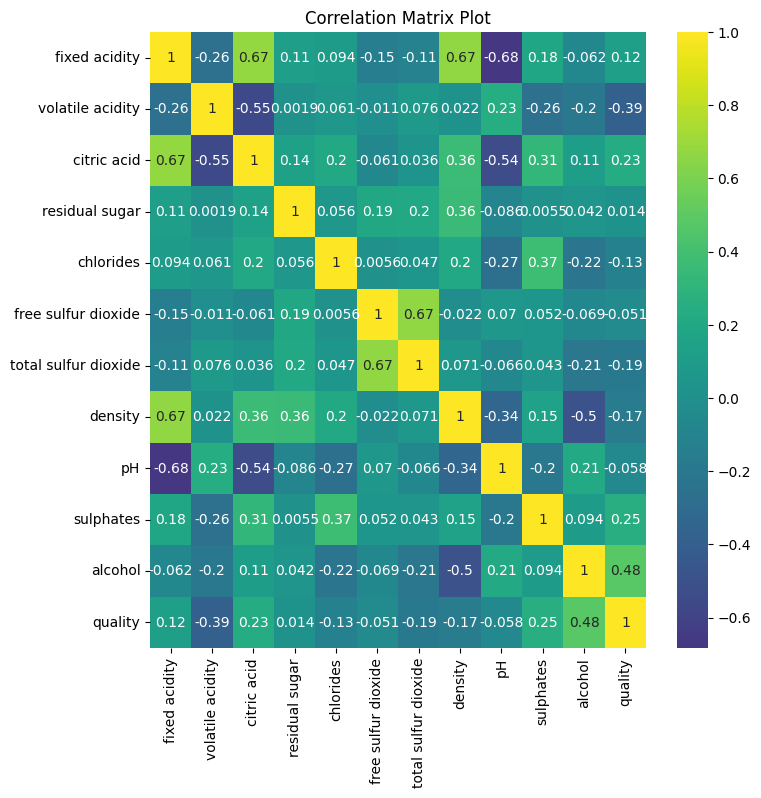

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Correlation Matrix Plot')
plt.show()


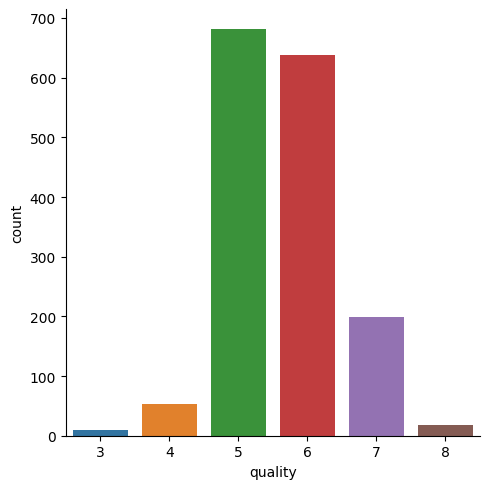

In [ ]:
sns.catplot(x='quality',data=data,kind='count')
plt.show()

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

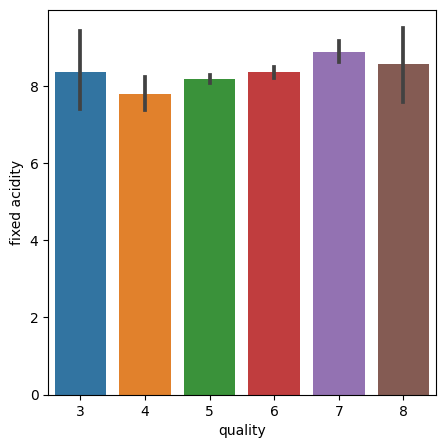

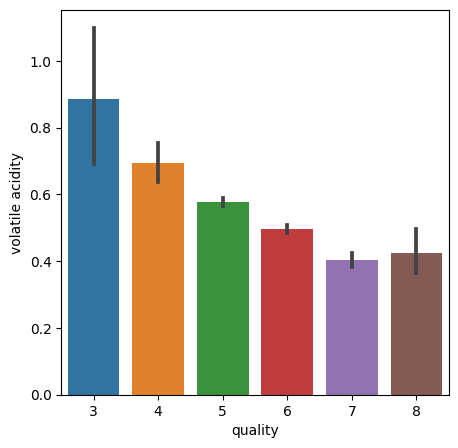

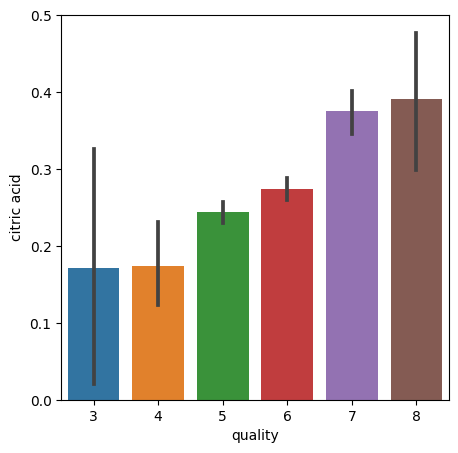

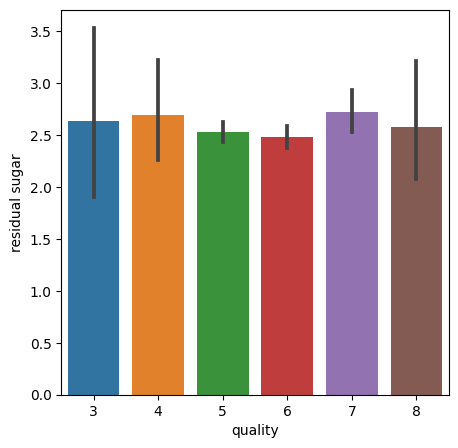

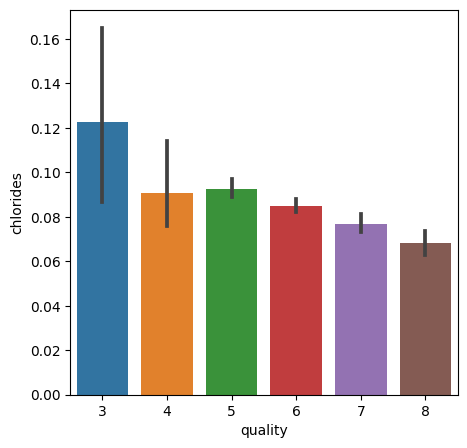

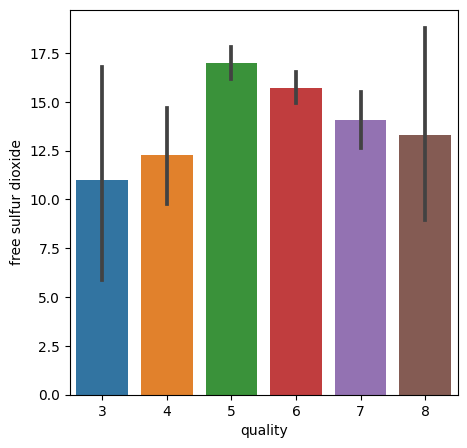

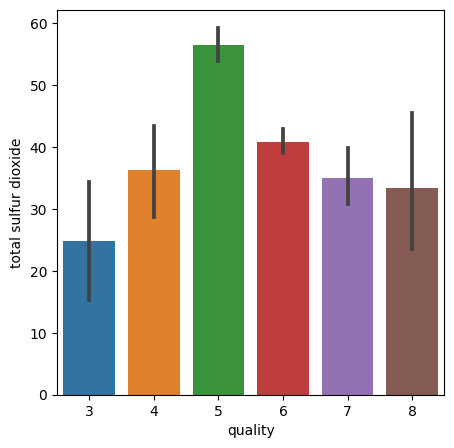

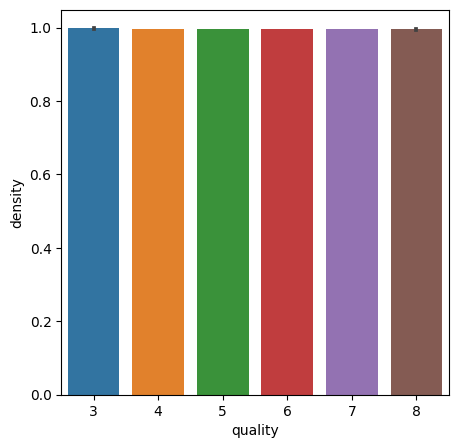

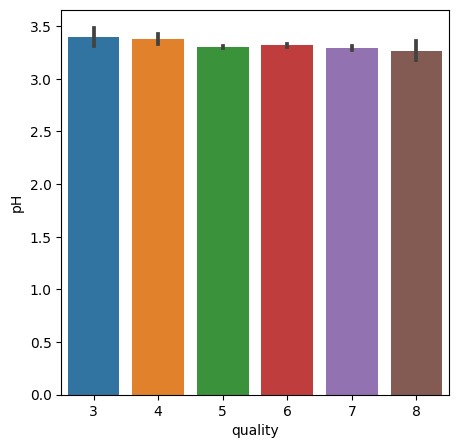

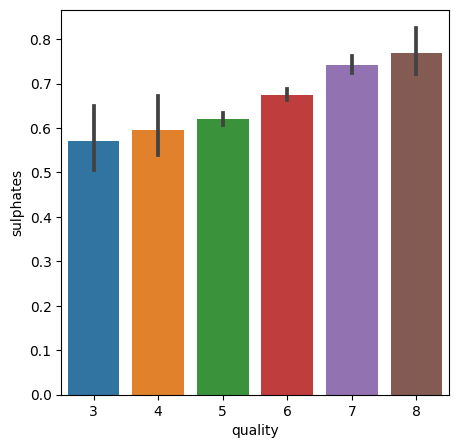

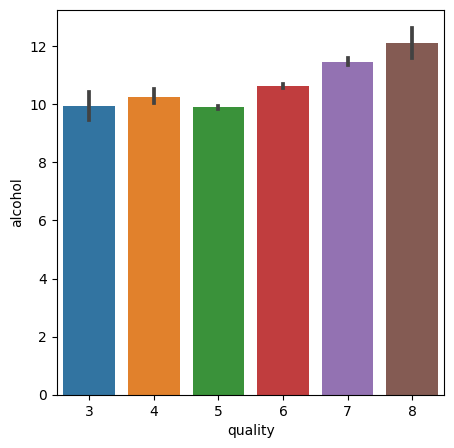

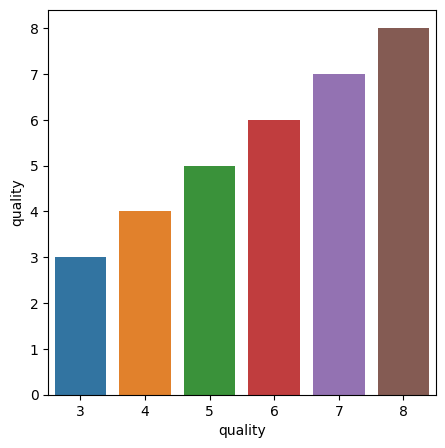

In [ ]:
for col in data.columns:
  plot=plt.figure(figsize=(5,5))
  sns.barplot(x='quality',y=col,data=data)

In [ ]:
# x=data[['fixed acidity','citric acid','sulphates','alcohol']]
x=data.drop(['quality','total sulfur dioxide'],axis=1)
y=data['quality']

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x_std=ss.transform(x)
x=x_std

In [ ]:
from imblearn.over_sampling  import SMOTE

In [ ]:
y=data['quality'].apply(lambda y:1 if y>=7 else 0)

In [ ]:
x_res,y_res=SMOTE().fit_resample(x,y)
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,train_size=0.7,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score


In [ ]:
models=[RandomForestClassifier(),SVC(),LogisticRegression(),KNeighborsClassifier()]

In [ ]:
m=[]
a=[]

for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(model)
  print("acc_score:",accuracy_score(y_pred,y_test))
  m.append(model)
  a.append(accuracy_score(y_pred,y_test))

RandomForestClassifier()
acc_score: 0.936144578313253
SVC()
acc_score: 0.8662650602409638
LogisticRegression()
acc_score: 0.8132530120481928
KNeighborsClassifier()
acc_score: 0.8662650602409638


In [ ]:
print("highest accuracy: ",max(a))

highest accuracy:  0.936144578313253


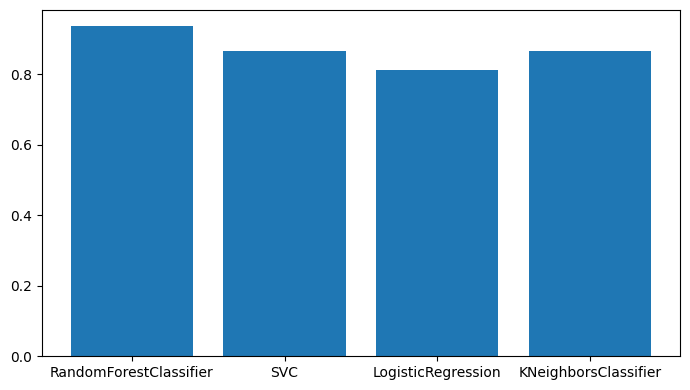

In [ ]:
model_names = [type(model).__name__ for model in models]
df = pd.DataFrame({'Model Name': model_names,'accuracy':a})

plt.figure(figsize=(7,4))
plt.bar(df['Model Name'],df['accuracy'])
plt.tight_layout()
plt.show()

Highrest accuracy score is approx 0.93 using RandomForestClassifier model.

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"r2_score: {r2}")

Mean Squared Error: 0.14182109976751103
r2_score: 0.4313949912420292
